In [348]:
import numpy as np
import matplotlib.pyplot as plt 
from copy import deepcopy, copy
import csv
import networkx as nx
import random

# Zadanie 1 - Gauss-Jordan

In [218]:
# it destroys A matrix making it identity matrix
# result after invoking the function is in array B
# pivoting function returns numbers of swapped columns if there was a change
def gauss_jordan(A, B, pivoting):
    perm = [i for i in range(len(A))]
    for i in range(len(A[0])):
        c1, c2 = pivoting(A, B, i)
        perm[c1], perm[c2] = perm[c2], perm[c1]
        # counting
        for j in range(len(A)):
            if j != i: 
                d = -A[j][i]/A[i][i]
                for k in range(i, len(A[i])):
                    A[j][k] += d*A[i][k]
                B[j] += d*B[i]
        d = A[i][i]
        for k in range(i, len(A[0])):
            A[i][k] /= d
        B[i] /= d
    #restore order
    res = [0 for i in range(len(perm))]
    for i in range(len(perm)):
        res[perm[i]] = B[i]
    B[:] = res[:]

In [219]:
A = np.random.rand(10,10)
B = np.random.rand(10)

## Bez pivotingu

In [220]:
def no_pivoting(A, B, i):
    return i,i

In [221]:
An = deepcopy(A)
Bn = copy(B)
gauss_jordan(An, Bn, pivoting=no_pivoting)
print(An)
print((A @ Bn) - B)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.11022302e-16  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.46944695e-18  0.00000000e+00 -2.22044605e-16  1.00000000e+00
   0.00000000e+00  4.44089210e-16  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.38777878e-17  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00

## Partial pivoting

In [222]:
def swap_rows(A, B, i, j):
    A[[i,j]] = A[[j,i]]
    B[i], B[j] = B[j], B[i]
def swap_columns(A, B, i, j):
    A[:, [j,i]] = A[:, [i,j]]

In [223]:
def partial_pivoting(A, B, i):
    besti = i
    for j in range(i+1,len(A)):
        if A[besti][i] < A[j][i]:
            besti = j
    swap_rows(A, B, i, besti)
    return i, i

In [224]:
Ap = deepcopy(A)
Bp = copy(B)
gauss_jordan(Ap, Bp, pivoting=partial_pivoting)
print(Ap)
print(A @ Bp - B)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.11022302e-16  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  5.55111512e-17  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00 -5.55111512e-17  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.77555756e-17
   5.55111512e-17  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00

## Full pivoting

In [225]:
def full_pivoting(A, B, i):
    bestj = i
    bestk = i
    for j in range(i,len(A)):
        for k in range(i, len(A[j])):
            if abs(A[bestj][bestk]) < abs(A[j][k]):
                bestj = j
                bestk = k
    swap_rows(A, B, i, bestj)
    swap_columns(A, B, i, bestk)
    return i, bestk

In [226]:
Af = deepcopy(A) #np.array([[1.,-4.,4.,7.], [0.,2.,-1.,0.], [2.,1.,1.,4.], [2.,-3.,2.,-5.]]) #deepcopy(A)
Bf = copy(B) #np.array([4.,5.,2.,9.])#copy(B)
gauss_jordan(Af, Bf, pivoting=full_pivoting)
print(Af)
print(A @ Bf - B)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.11022302e-16  0.00000000e+00 -1.11022302e-16  0.00000000e+00
   0.00000000e+00  5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   1.73472348e-18  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00 -1.38777878e-17
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00 -1.11022302e-16
   0.00000000e+00  0.00000000e+00

# Zadanie 2

In [227]:
def LU(A):
    for i in range(len(A[0])):
        #counting
        for j in range(i+1, len(A)):
            d = -A[j][i]/A[i][i]
            for k in range(i, len(A[i])):
                A[j][k] += d*A[i][k]
            A[j][i] = -d;
    L = np.zeros((len(A), len(A)))
    U = np.zeros((len(A), len(A)))
    for i in range(len(A[0])):
        for j in range(len(A)):
            if i==j:
                L[i][j] = 1
                U[i][j] = A[i][j]
            elif i < j:
                L[i][j] = 0
                U[i][j] = A[i][j]
            else:
                L[i][j] = A[i][j]
                U[i][j] = 0
    return L, U
                

In [228]:
A = np.random.rand(5,5)
print(A)
L, U = LU(A)
print(L)
print(U)
print(L @ U)

[[0.31788932 0.43112727 0.27060306 0.42254615 0.53504442]
 [0.58645433 0.15811122 0.72487582 0.67803905 0.25933941]
 [0.31779495 0.81341488 0.86205091 0.31926918 0.74089111]
 [0.03096101 0.06577777 0.74693867 0.85298978 0.99496591]
 [0.23817091 0.13202511 0.51304136 0.94156378 0.48105622]]
[[ 1.          0.          0.          0.          0.        ]
 [ 1.84483812  1.          0.          0.          0.        ]
 [ 0.99970315 -0.60010407  1.          0.          0.        ]
 [ 0.09739555 -0.03732905  1.00283495  1.          0.        ]
 [ 0.74922589  0.29970493  0.33381859  0.73019375  1.        ]]
[[ 0.31788932  0.43112727  0.27060306  0.42254615  0.53504442]
 [ 0.         -0.6372488   0.22565697 -0.1014902  -0.72773093]
 [ 0.          0.          0.72694584 -0.16405622 -0.23070877]
 [ 0.          0.          0.          0.97256844  1.14705228]
 [ 0.          0.          0.          0.         -0.46226389]]
[[0.31788932 0.43112727 0.27060306 0.42254615 0.53504442]
 [0.58645433 0.1581

# Zadanie 3

In [326]:
# File format:
# node1,node2,resistance_between_them
# and exactly one row as s,node1,node2,sem - source
def import_graph_from_file(file):
    records = []
    G = nx.Graph()
    with open(file, "r") as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            records.append(row)
    for i, record in enumerate(records):
        if record[0] == 's':
            G.add_edge(int(record[1]), int(record[2]), R=0, sem=int(record[3]), no=i)
        else:
            G.add_edge(int(record[0]), int(record[1]), R=abs(int(record[2])), no=i, sem=0)
    return G

In [327]:
# we assume that current flows from node with bigger no to one with smaller
def eqs_Kirchoff_I(G):
    eqs = []
    b = [0 for i in range(len(G.nodes))]
    for n in G.nodes:
        I = [0 for i in range(len(G.edges))]
        for e in G.edges(n):
            data = G.get_edge_data(*e)
            I[data['no']] = 1 if e[0] > e[1] else -1
        eqs.append(I)
    return eqs, b

In [328]:
def eqs_Kirchoff_II(G):
    eqs = []
    b = []
    for cycle in nx.cycle_basis(G):
        I = [0 for i in range(len(G.edges))]
        b.append(0)
        for i in range(len(cycle)):
            n1 = cycle[i]
            n2 = cycle[(i + 1) % len(cycle)]
            data = G.get_edge_data(n1, n2)
            I[data['no']] = data['R'] if n1 > n2 else -data['R']
            b[-1] += data['sem'] if n1 > n2 else -data['sem']
        eqs.append(I)
    return eqs, b

In [329]:
def create_eqs(G):
    eqs, b = eqs_Kirchoff_I(G)
    eqs2, b2 = eqs_Kirchoff_II(G)
    eqs += eqs2
    b += b2
    return eqs, b

In [330]:
def solve(A, B, G):
    I = np.linalg.lstsq(A, B, rcond=None)[0]
    for e in G.edges:
        edg = G.get_edge_data(*e)
        edg['I'] = I[edg['no']]
    return G

In [331]:
def validate(G, eps = 1e-8):
    for n in G.nodes:
        sum = 0
        for e in G.edges(n):
            I = G.get_edge_data(*e)['I']
            sum += I if e[0] > e[1] else -I
        if abs(sum) > eps:
            raise Exception('Currents in node don\'t sum up to 0')
                

In [332]:
def as_directed_graph(G):
    DG = nx.DiGraph()
    for e in G.edges:
        edg = G.get_edge_data(*e)
        if edg['I'] > 0:
            DG.add_edge(min(*e), max(*e), I=abs(edg['I']))
        else:
            DG.add_edge(max(*e), min(*e), I=abs(edg['I']))
    return DG

In [387]:
def visualize_graph(G, layout=nx.layout.spring_layout):
    edge_colors = list(map(lambda x: x[2]['I'], G.edges.data()))
    pos = nx.layout.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=5, node_color='blue')
    nx.draw_networkx_edges(G, pos, width=4, edge_color=edge_colors, edge_cmap=plt.cm.Blues, with_labels=True)
    ax = plt.gca()
    ax.set_axis_off()
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.show()

In [388]:
def process_graph(G, layout=nx.layout.spring_layout):
    I, E = create_eqs(G)
    G = solve(I, E, G)
    validate(G)
    G = as_directed_graph(G)
    visualize_graph(G, layout)

In [389]:
def process_graph_file(file):
    G = import_graph_from_file(file)
    process_graph(G)

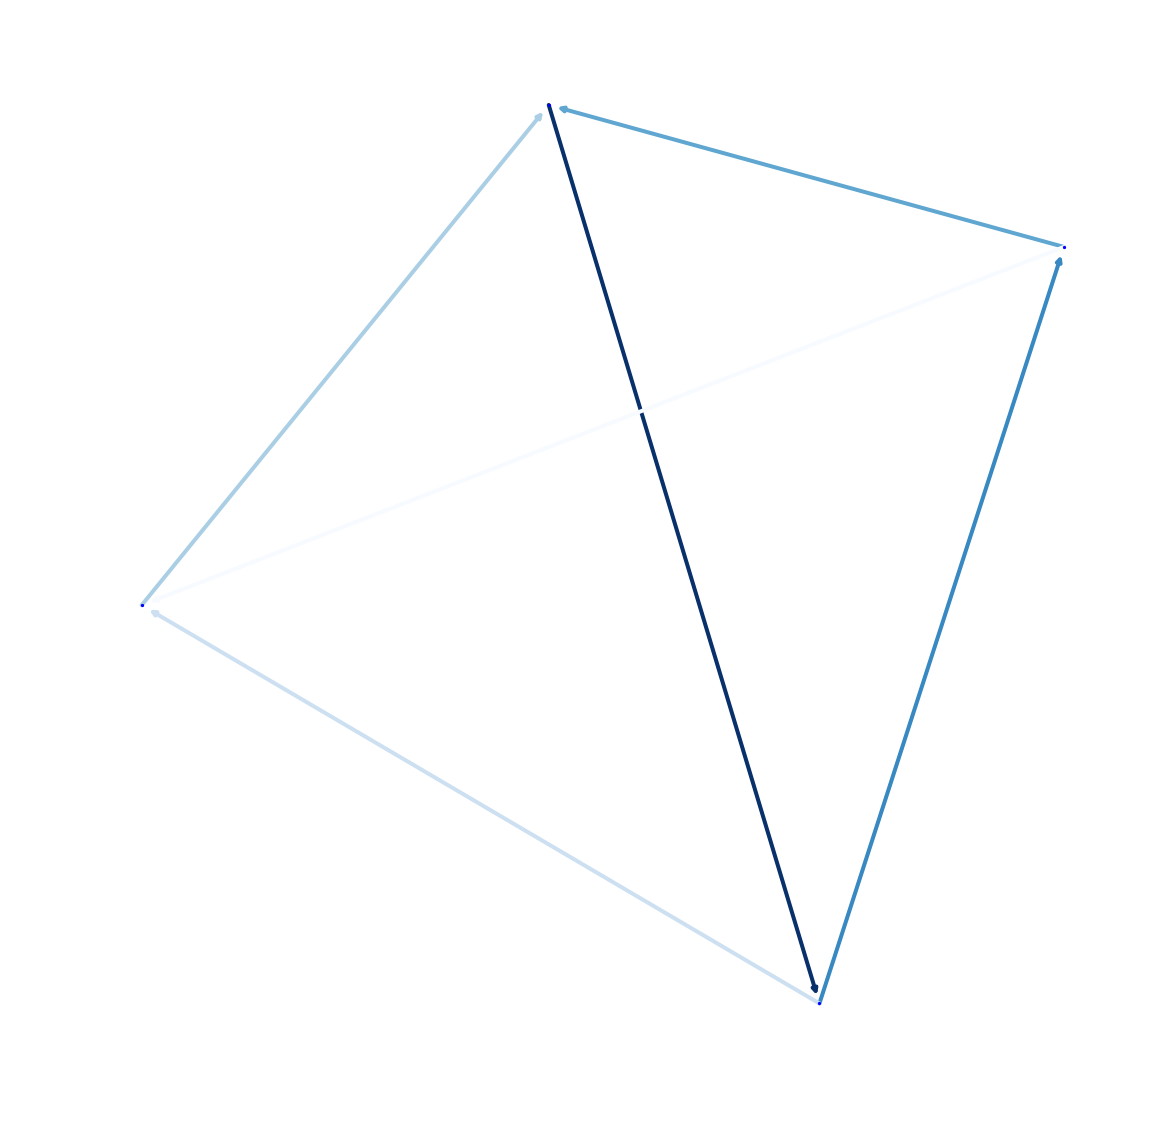

In [390]:
process_graph_file('small.csv')

In [552]:
def fill_graph_with_rand_values(G):
    first = list(G.nodes)[0]
    last = list(G.nodes)[-1]
    G.add_edge(first, last, R=0, sem=random.random()*100)
    for i,e in enumerate(G.edges.data()):
        edata = e[2]
        val = random.random()*10
        edata['sem'] = 0 if 'sem' not in edata else edata['sem']
        edata['R'] = random.random()*10 if edata['sem'] == 0 else 0 
        edata['no'] = i

In [553]:
def save_graph_as_file(G, file_name):
    with open(file_name, 'w+') as file:
        writer = csv.writer(file)
        for e in G.edges.data():
            if e[2]['sem'] != 0:
                writer.writerow(['s', e[0], e[1], e[2]['sem']])
            else:
                writer.writerow([e[0], e[1], e[2]['R']])
        file.close()

In [554]:
def generate_graph( gen, layout, file=None, *arg):
    G = gen(*arg)
    fill_graph_with_rand_values(G) 
    process_graph(G, layout)
    if file:
        save_graph_as_file(G, file)

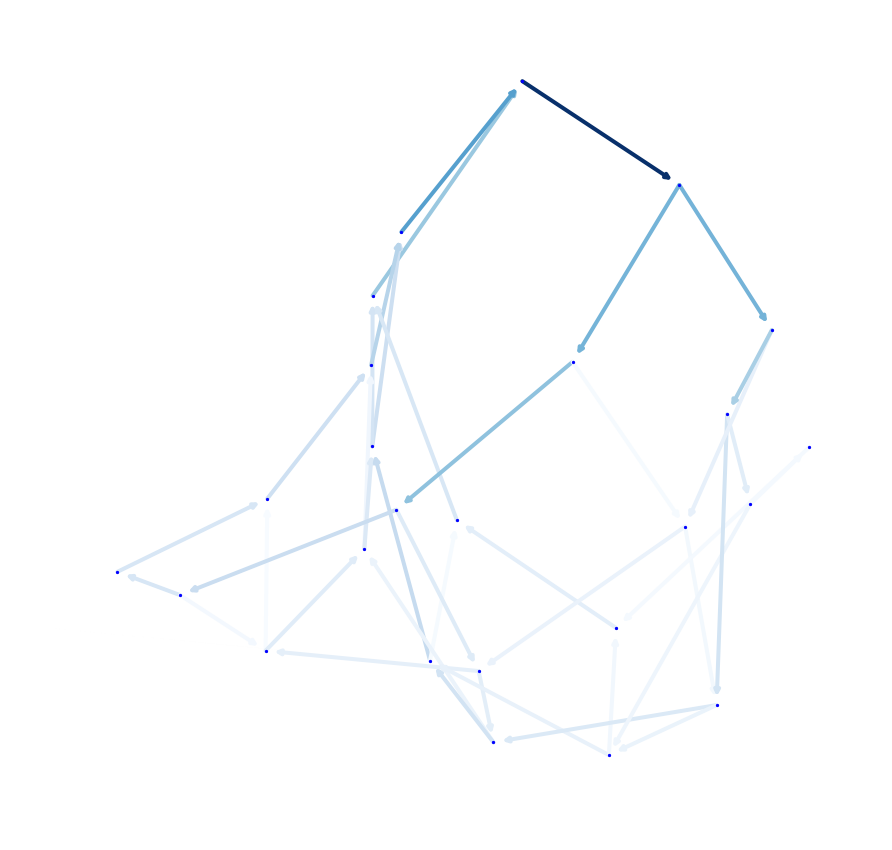

In [556]:
#generate_graph(nx.generators.classic.circulant_graph, nx.circular_layout, None, 20, [1,2])
#generate_graph(nx.generators.small.cubical_graph, nx.spring_layout, None)
generate_graph(nx.generators.lattice.grid_2d_graph, nx.spring_layout, None, 5, 5)